<a href="https://colab.research.google.com/github/SUSHWANTH1567/23CSBTB29/blob/main/assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementation of Linear Regression on Housing Data**

In [ ]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# Import the numpy and pandas package
import numpy as np
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
housing=pd.read_csv("/content/Housing.csv")
# Check the head of the dataset
print(housing.head())
#Data Inspection
housing.shape
housing.info()
housing.describe()

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


from matplotlib import pyplot as plt
_df_0['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['area'].plot(kind='hist', bins=20, title='area')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['bedrooms'].plot(kind='hist', bins=20, title='bedrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['bathrooms'].plot(kind='hist', bins=20, title='bathrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='price', y='area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='area', y='bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='bedrooms', y='bathrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='bathrooms', y='stories', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['area'].plot(kind='line', figsize=(8, 4), title='area')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['bedrooms'].plot(kind='line', figsize=(8, 4), title='bedrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['bathrooms'].plot(kind='line', figsize=(8, 4), title='bathrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]
# There are no NULL values in the dataset, hence it is clean.

,0
price,0.0
area,0.0
bedrooms,0.0
bathrooms,0.0
stories,0.0
mainroad,0.0
guestroom,0.0
basement,0.0
hotwaterheating,0.0
airconditioning,0.0


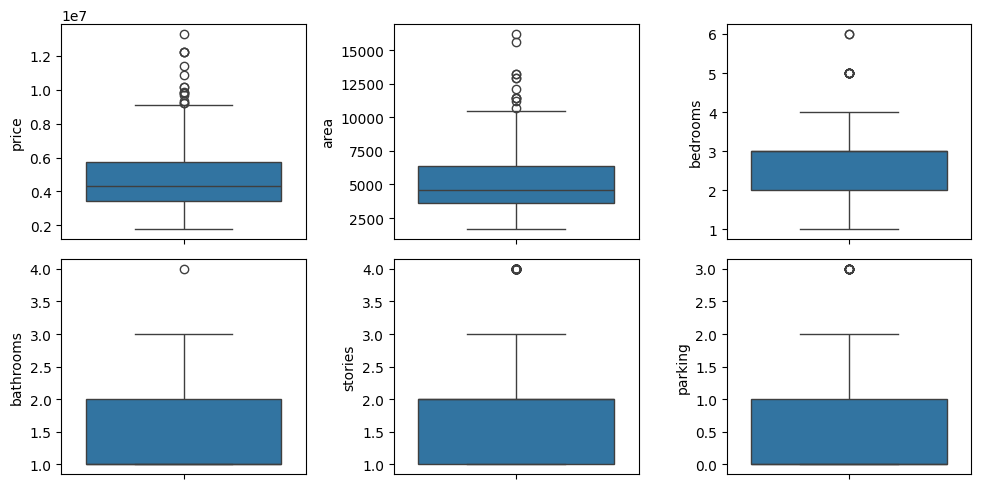

In [ ]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

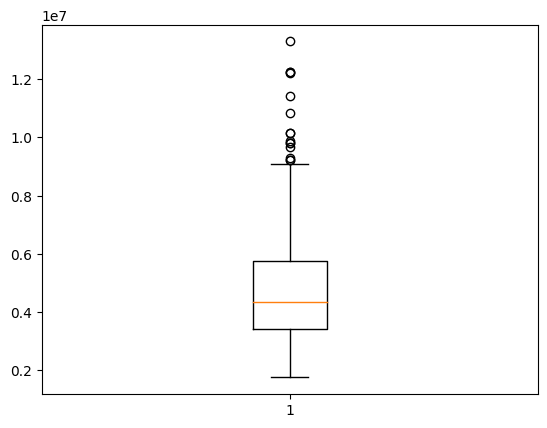

In [ ]:

# Outlier Treatment
# Price and area have considerable outliers.
# We can drop the outliers as we have sufficient data.
# outlier treatment for price
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]


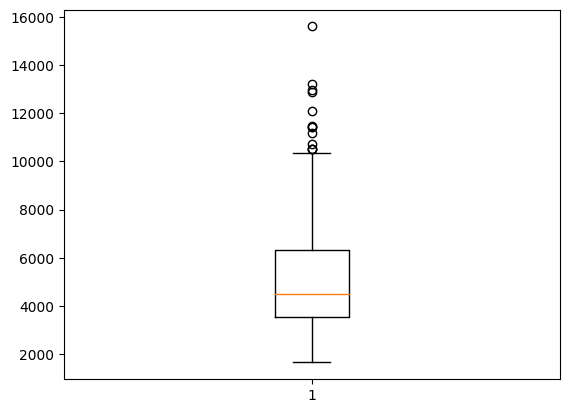

In [ ]:

# outlier treatment for area
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

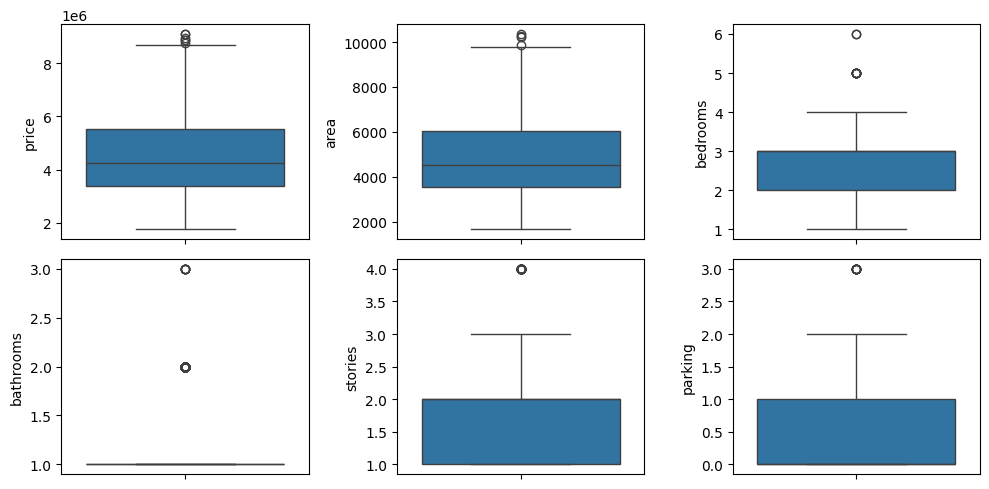

In [ ]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

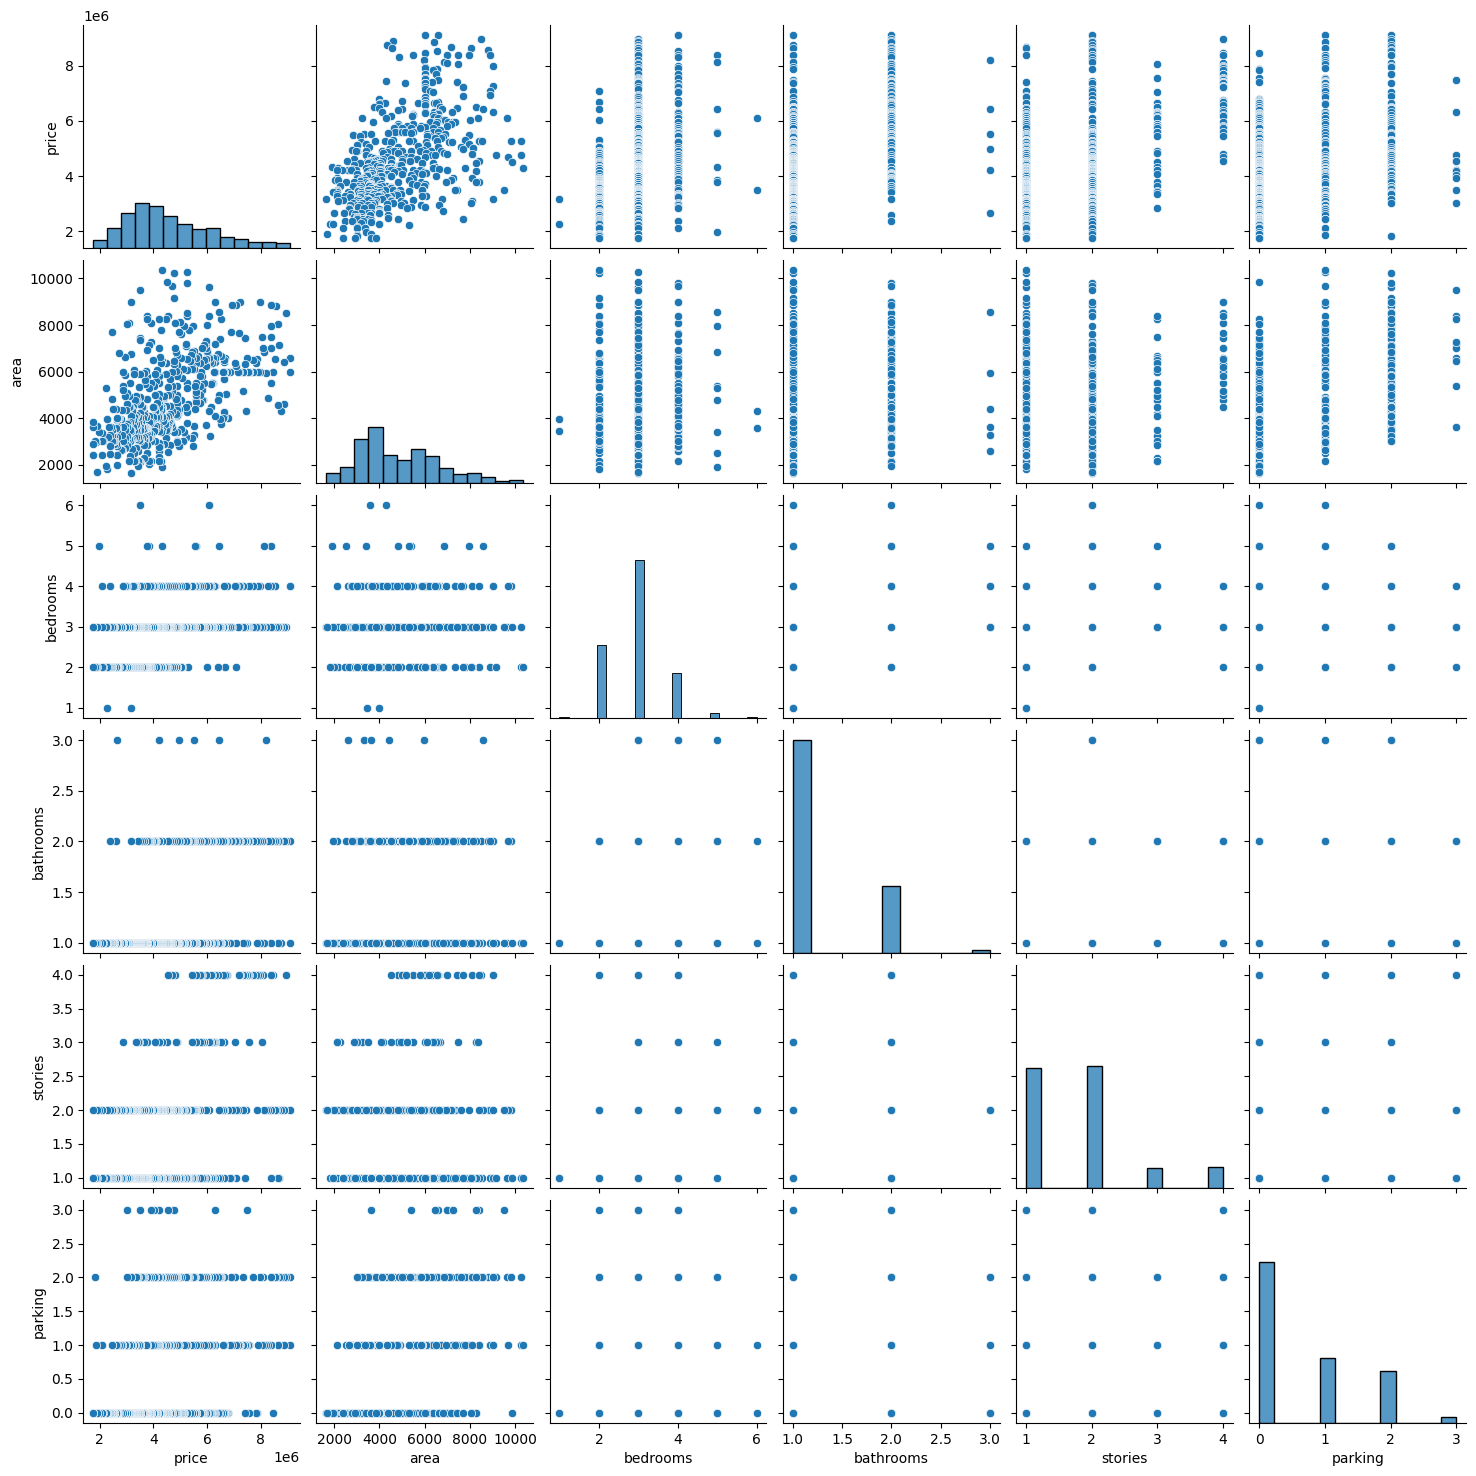

In [ ]:
sns.pairplot(housing)
plt.show()


**Visualising Categorical Variables**

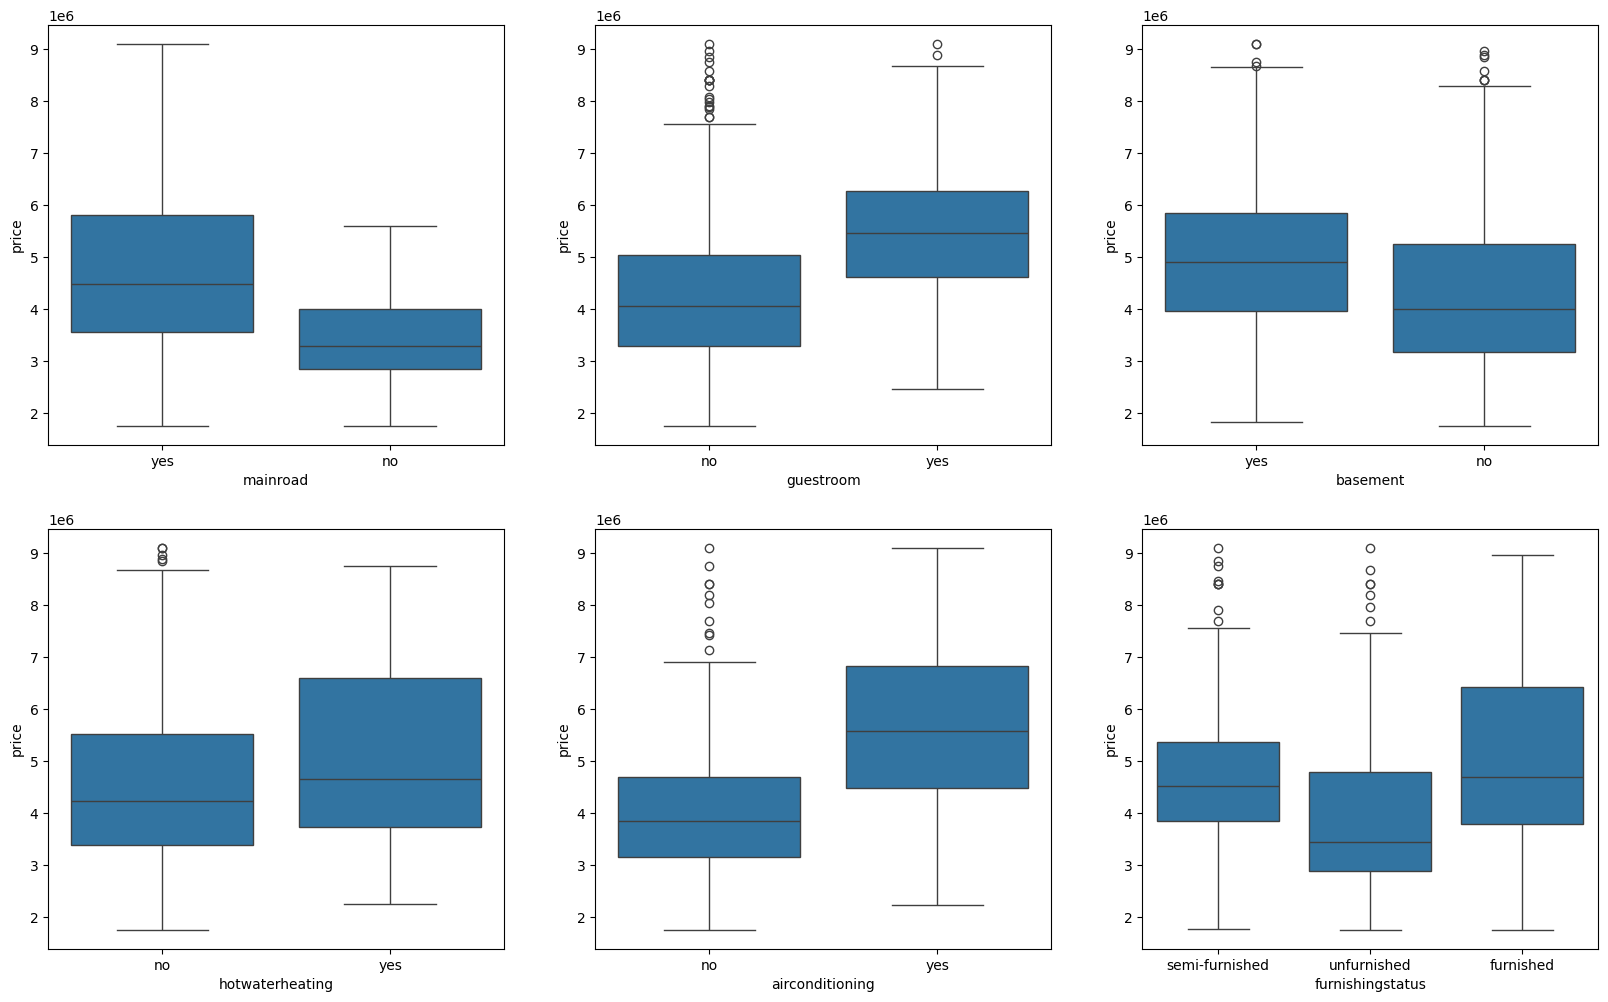

In [ ]:

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

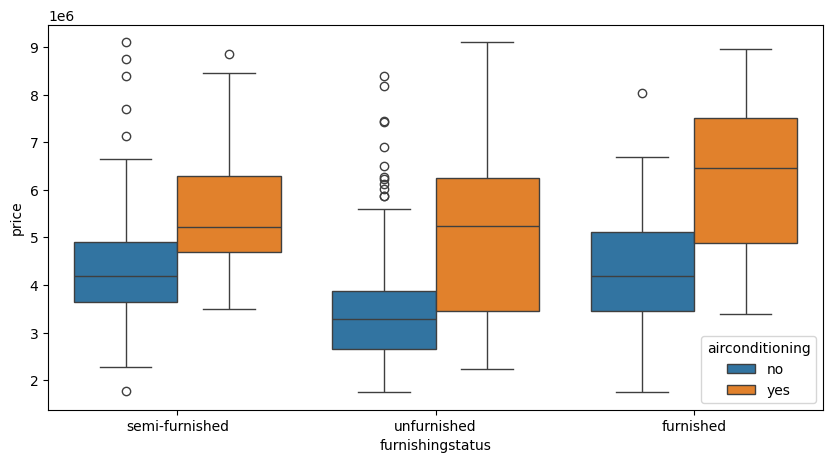

In [ ]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

**Data Preparation**

In [ ]:

# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


**Dummy Variables**

In [ ]:
status = pd.get_dummies(housing['furnishingstatus'])

In [ ]:
status.head()


,furnished,semi-furnished,unfurnished
15,False,True,False
16,False,False,True
17,True,False,False
18,True,False,False
19,False,True,False


from matplotlib import pyplot as plt
import seaborn as sns
_df_12.groupby('furnished').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_13.groupby('semi-furnished').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_14.groupby('unfurnished').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['semi-furnished'].value_counts()
    for x_label, grp in _df_15.groupby('furnished')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('furnished')
_ = plt.ylabel('semi-furnished')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['unfurnished'].value_counts()
    for x_label, grp in _df_16.groupby('semi-furnished')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('semi-furnished')
_ = plt.ylabel('unfurnished')

In [ ]:

status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)



In [ ]:
housing = pd.concat([housing, status], axis = 1)

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,True,False


In [ ]:
housing.drop(['furnishingstatus'], axis = 1, inplace = True)


In [ ]:

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False


**Splitting the Data into Training and Testing Sets**

In [ ]:

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)


**MinMax scaling**

In [ ]:

from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:

df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
148,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,True,False
236,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,True,False
356,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,False,False
425,0.219048,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,False,False
516,0.095238,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,False,True


In [ ]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.383701,0.350081,0.390582,0.127424,0.268698,0.875346,0.168975,0.349030,0.038781,0.313019,0.218837,0.207756
std,0.209712,0.207184,0.149146,0.224465,0.287833,0.330784,0.375250,0.477325,0.193341,0.464366,0.287286,0.406264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.237143,0.189829,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.338095,0.295092,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.514286,0.491425,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


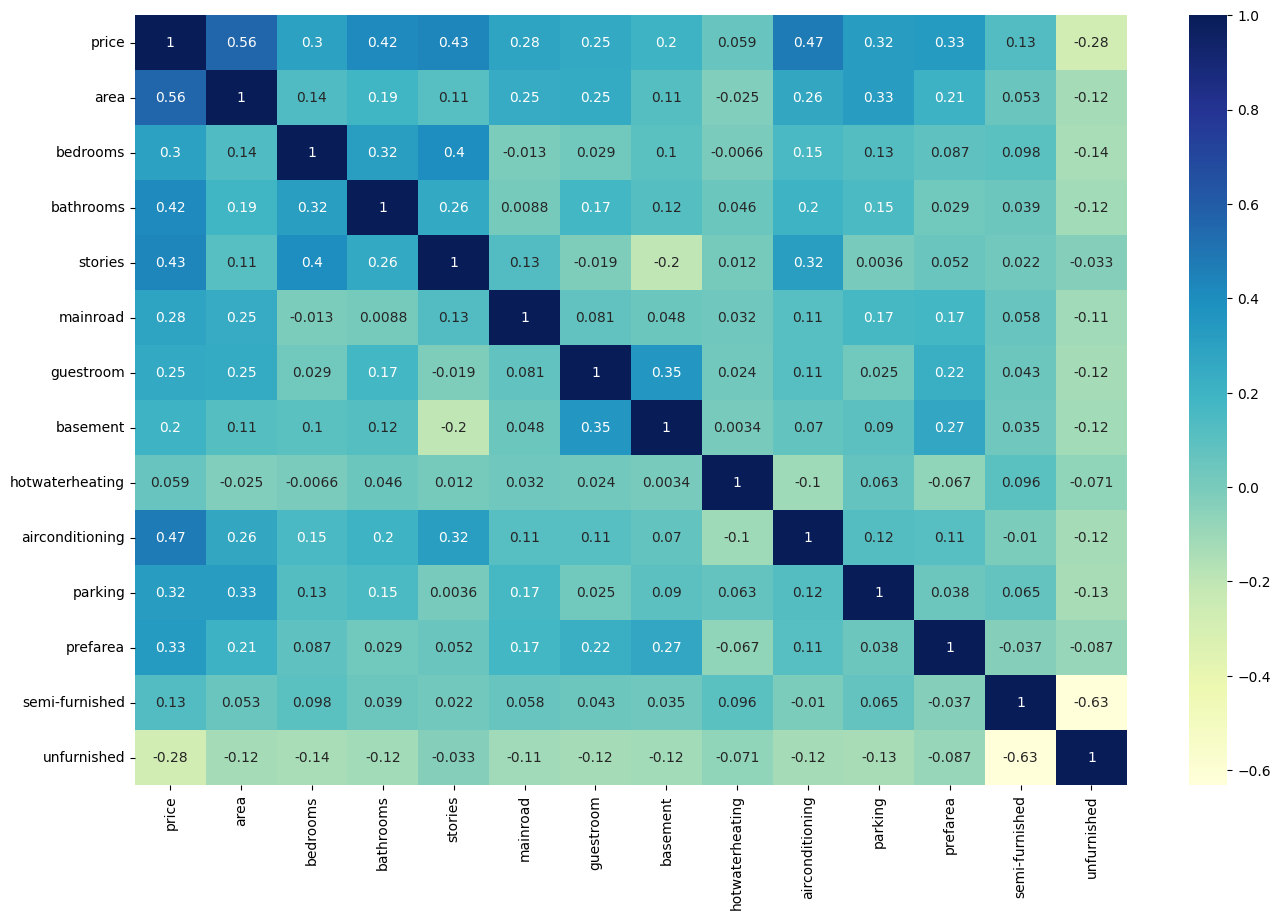

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
# Try printing out the columns to check if 'price' exists and check for typos
print(df_train.columns)

# If the column does exist, you can try the following
if 'price' in df_train.columns:
  y_train = df_train.pop('price')
  X_train = df_train
else:
  print("The 'price' column does not exist in the DataFrame.")

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')
The 'price' column does not exist in the DataFrame.


In [ ]:

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming df_train is your DataFrame
# Check if 'price' column exists, case-sensitive
if 'price' in df_train.columns:
  y_train = df_train.pop('price')  # Separate target variable
  X_train = df_train  # Assign remaining columns to features
else:
  print("The 'price' column does not exist in the DataFrame.")
  # Print available columns to help identify potential typos or the correct column name
  print(f"Available columns: {df_train.columns}")

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
# Only fit the model if X_train and y_train are defined
if 'X_train' in locals() and 'y_train' in locals():
    lm.fit(X_train, y_train)
else:
    print("Cannot fit the model. X_train and/or y_train are not defined.")

The 'price' column does not exist in the DataFrame.
Available columns: Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')
Cannot fit the model. X_train and/or y_train are not defined.


LinearRegression()
**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [3]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE # Added import statement for RFE
from sklearn.linear_model import LinearRegression

# Create a sample DataFrame (replace this with your actual data loading)
import pandas as pd
df_train = pd.DataFrame({'price': [10, 20, 30], 'feature1': [1, 2, 3], 'feature2': [4, 5, 6]})

# Check if 'price' column exists, case-sensitive
if 'price' in df_train.columns:
  y_train = df_train.pop('price')  # Separate target variable
  X_train = df_train  # Assign remaining columns to features
else:
  print("The 'price' column does not exist in the DataFrame.")
  # Print available columns to help identify potential typos or the correct column name
  print(f"Available columns: {df_train.columns}")

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
# Only fit the model if X_train and y_train are defined
if 'X_train' in locals() and 'y_train' in locals():
    lm.fit(X_train, y_train)
else:
    print("Cannot fit the model. X_train and/or y_train are not defined.")

rfe = RFE(estimator=lm, n_features_to_select=6) # running RFE with the keyword argument n_features_to_select
rfe = rfe.fit(X_train, y_train)

In [4]:

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('feature1', True, 1), ('feature2', True, 1)]

In [5]:
col = X_train.columns[rfe.support_]
col

Index(['feature1', 'feature2'], dtype='object')

In [6]:

X_train.columns[~rfe.support_]

Index([], dtype='object')

In [7]:
X_train_rfe = X_train[col]

In [8]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [9]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [10]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.679e+28
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           2.46e-15
Time:                        05:03:19   Log-Likelihood:                 89.001
No. Observations:                   3   AIC:                            -174.0
Df Residuals:                       1   BIC:                            -175.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7273   2.53e-14  -1.08e+14      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [11]:

# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Features,VIF
1,feature1,inf
2,feature2,inf
0,const,0.0


In [15]:

y_train_price = lm.predict(X_train_rfe)

In [16]:
res = (y_train_price - y_train)

In [17]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<ipython-input-18-ea9ea8a0a5af>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 20)


Text(0.5, 0, 'Errors')

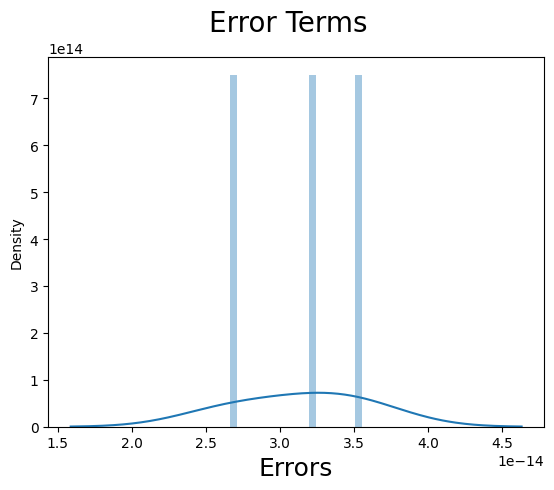

In [18]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

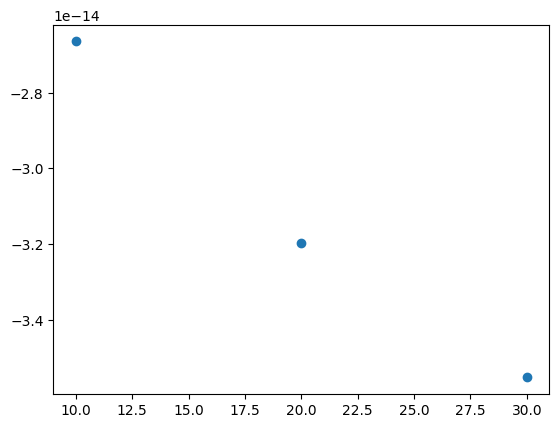

In [19]:

plt.scatter(y_train,res)
plt.show()

In [20]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [25]:
# Importing the required libraries
from sklearn.preprocessing import StandardScaler

# Instantiate a StandardScaler object
scaler = StandardScaler()


In [27]:
# Assuming df_test is a pandas DataFrame, create it before using it.
# Replace the sample data with your actual data.
import pandas as pd

df_test = pd.DataFrame({'price': [100, 200, 300],
                        'other_column': [1, 2, 3]})

y_test = df_test.pop('price')
X_test = df_test

In [28]:

# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [30]:
common_cols = X_test.columns.intersection(X_train_rfe.columns)
X_test_rfe = X_test[common_cols]

In [36]:
# Add a constant to X_test_rfe if lm was trained with a constant
X_test_rfe = sm.add_constant(X_test_rfe, has_constant='add')

# Making predictions
y_pred = lm.predict(X_test_rfe)

In [37]:

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


-5.571570247933885

Text(0, 0.5, 'y_pred')

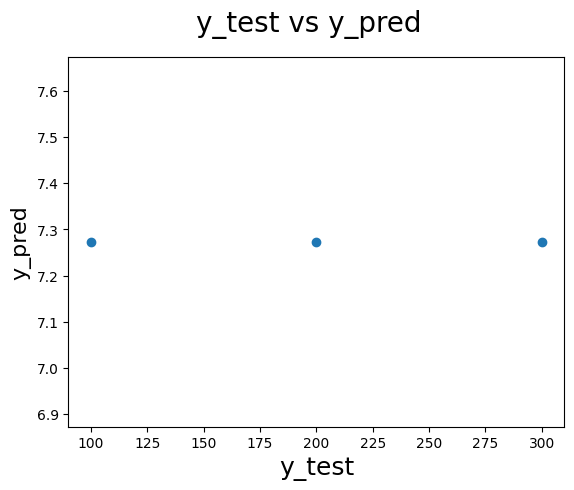

In [38]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label